# Homework 

During the exercise you will be using the data from the 1987 National Indonesia Contraceptive Prevalence Survey. The detailed description of the dataset can be found at [UCI ML Repository website](https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice). Read the raw data from the following URL: [https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data](https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data)

Your tasks are as follows:

- Identify the format of the raw data and read it into a dataframe correctly. Remember to provide a list of meaningful attribute names
- Normalize the `Age` attribute
- Remove the column containing the information about religion
- Create a second dataframe containig only women with highest degree of education
- Recode the `Wife working now` attribute, changing 0 to 'no' and 1 to 'yes'
- Compute the frequency of contraceptive methods grouping by the woman's education level
- Create a new column which will contain the average degree of education between a wife and a husband
- Create a new binary column which will indicate if a given woman has given birth to more than the average number of children
- Change `Standard of living` column into an ordered category
- Recode `Wife's education` attribute into a set of binary attributes using dummy variables
- Plot the histogram of the number of children
- Plot the bar chart of the standard of living

Save your notebook as *firstname.lastname.ipynb* and upload it to [the shared folder](https://drive.google.com/drive/folders/1WFtwffp2u8EdD9gtuN92VWeIRjz_MF8t?usp=sharing). The deadline for submitting your solutions is **Sunday, April 2, 21:00**. For this assignement you can get the maximum of **10 pts**.

In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import MinMaxScaler

In [375]:
col_names = ["Age", "Education", "Husband_education", 
             "Children_number", "Religion", "Working", 
             "Husband_ocupation", "Living_index", "Media_exposure", "Contraceptive_method_used"]

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data', names=col_names)

In [376]:
#scaler = MinMaxScaler()
#data['Age'] = scaler.fit_transform(data[['Age']])

In [377]:
#data["Age"]

In [378]:
data["Age"] = (data["Age"]-data["Age"].min()) / (data["Age"].max()-data["Age"].min())
data["Age"]

0       0.242424
1       0.878788
2       0.818182
3       0.787879
4       0.606061
          ...   
1468    0.515152
1469    0.515152
1470    0.696970
1471    0.515152
1472    0.030303
Name: Age, Length: 1473, dtype: float64

In [379]:
data = data.drop("Religion", axis=1)
data.head()

,Age,Education,Husband_education,Children_number,Working,Husband_ocupation,Living_index,Media_exposure,Contraceptive_method_used
0,0.242424,2,3,3,1,2,3,0,1
1,0.878788,1,3,10,1,3,4,0,1
2,0.818182,2,3,7,1,3,4,0,1
3,0.787879,3,2,9,1,3,3,0,1
4,0.606061,3,3,8,1,3,2,0,1


In [380]:
data_most_educated_woman = data[data["Education"] == 4]
data_most_educated_woman.head()

,Age,Education,Husband_education,Children_number,Working,Husband_ocupation,Living_index,Media_exposure,Contraceptive_method_used
5,0.090909,4,4,0,1,3,3,0,1
12,0.848485,4,4,1,0,1,4,0,1
22,0.909091,4,4,1,1,1,4,0,1
23,0.696970,4,4,1,1,1,4,0,1
24,0.969697,4,4,5,1,1,4,0,1


In [381]:
data["Working"] = data["Working"].map({0:'no', 1:'yes'})
data.head()

,Age,Education,Husband_education,Children_number,Working,Husband_ocupation,Living_index,Media_exposure,Contraceptive_method_used
0,0.242424,2,3,3,yes,2,3,0,1
1,0.878788,1,3,10,yes,3,4,0,1
2,0.818182,2,3,7,yes,3,4,0,1
3,0.787879,3,2,9,yes,3,3,0,1
4,0.606061,3,3,8,yes,3,2,0,1


In [382]:
data["Contraceptive_method_used"].groupby(data["Education"]).value_counts()

Education  Contraceptive_method_used
1          1                            103
           3                             40
           2                              9
2          1                            176
           3                            121
           2                             37
3          1                            175
           3                            155
           2                             80
4          2                            207
           3                            195
           1                            175
Name: Contraceptive_method_used, dtype: int64

In [383]:
data['Avg_degree'] = data.loc[:, "Education":"Husband_education"].apply(np.mean, axis=1)
data

,Age,Education,Husband_education,Children_number,Working,Husband_ocupation,Living_index,Media_exposure,Contraceptive_method_used,Avg_degree
0,0.242424,2,3,3,yes,2,3,0,1,2.5
1,0.878788,1,3,10,yes,3,4,0,1,2.0
2,0.818182,2,3,7,yes,3,4,0,1,2.5
3,0.787879,3,2,9,yes,3,3,0,1,2.5
4,0.606061,3,3,8,yes,3,2,0,1,3.0
...,...,...,...,...,...,...,...,...,...,...
1468,0.515152,4,4,2,no,2,4,0,3,4.0
1469,0.515152,4,4,3,yes,1,4,0,3,4.0
1470,0.696970,3,3,8,no,1,4,0,3,3.0
1471,0.515152,3,3,4,no,2,2,0,3,3.0


In [384]:
average_children_number = data.Children_number.mean()
average_children_number

3.2613713509843856

In [385]:
data["Average_children"] = data['Children_number'].apply(lambda x: 1 if x > average_children_number else 0)
data.head()

,Age,Education,Husband_education,Children_number,Working,Husband_ocupation,Living_index,Media_exposure,Contraceptive_method_used,Avg_degree,Average_children
0,0.242424,2,3,3,yes,2,3,0,1,2.5,0
1,0.878788,1,3,10,yes,3,4,0,1,2.0,1
2,0.818182,2,3,7,yes,3,4,0,1,2.5,1
3,0.787879,3,2,9,yes,3,3,0,1,2.5,1
4,0.606061,3,3,8,yes,3,2,0,1,3.0,1


In [386]:
living_standards_indexes = CategoricalDtype(categories=[1, 2, 3, 4], ordered=True)
#living_standards_indexes = CategoricalDtype(categories=['lowest', 'low', 'medium', 'high'], ordered=True)
#data["Living_index"] = data["Living_index"].map({1:'lowest', 2:'low', 3:'medium', 4:'high'})
data['Living_index'] = data['Living_index'].astype(living_standards_indexes)
data.head()

,Age,Education,Husband_education,Children_number,Working,Husband_ocupation,Living_index,Media_exposure,Contraceptive_method_used,Avg_degree,Average_children
0,0.242424,2,3,3,yes,2,3,0,1,2.5,0
1,0.878788,1,3,10,yes,3,4,0,1,2.0,1
2,0.818182,2,3,7,yes,3,4,0,1,2.5,1
3,0.787879,3,2,9,yes,3,3,0,1,2.5,1
4,0.606061,3,3,8,yes,3,2,0,1,3.0,1


In [387]:
data.sort_values('Living_index')

,Age,Education,Husband_education,Children_number,Working,Husband_ocupation,Living_index,Media_exposure,Contraceptive_method_used,Avg_degree,Average_children
1198,0.939394,2,3,5,yes,1,1,0,1,2.5,1
705,0.121212,2,3,1,yes,2,1,0,3,2.5,0
571,0.151515,4,4,1,yes,2,1,0,2,4.0,0
1094,0.666667,1,2,6,yes,2,1,1,1,1.5,1
712,0.454545,3,3,3,yes,2,1,1,3,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...
933,0.363636,4,4,2,yes,2,4,0,3,4.0,0
934,0.909091,4,4,4,yes,1,4,0,3,4.0,1
935,0.545455,4,3,3,yes,2,4,0,3,3.5,0
426,0.696970,4,4,4,yes,1,4,0,2,4.0,1


In [388]:
education_levels = pd.get_dummies(data.Education, prefix='wife_education')
education_levels

,wife_education_1,wife_education_2,wife_education_3,wife_education_4
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
1468,0,0,0,1
1469,0,0,0,1
1470,0,0,1,0
1471,0,0,1,0


In [389]:
#data = data.drop("Education", axis=1)
data = pd.concat([data, education_levels], axis=1)
data.head()

,Age,Education,Husband_education,Children_number,Working,Husband_ocupation,Living_index,Media_exposure,Contraceptive_method_used,Avg_degree,Average_children,wife_education_1,wife_education_2,wife_education_3,wife_education_4
0,0.242424,2,3,3,yes,2,3,0,1,2.5,0,0,1,0,0
1,0.878788,1,3,10,yes,3,4,0,1,2.0,1,1,0,0,0
2,0.818182,2,3,7,yes,3,4,0,1,2.5,1,0,1,0,0
3,0.787879,3,2,9,yes,3,3,0,1,2.5,1,0,0,1,0
4,0.606061,3,3,8,yes,3,2,0,1,3.0,1,0,0,1,0


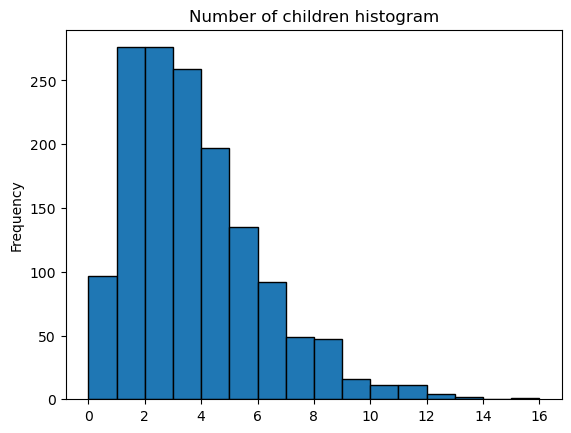

In [390]:
%matplotlib inline
data.Children_number.plot(kind='hist', bins=data.Children_number.max(), edgecolor='black', title="Number of children histogram");

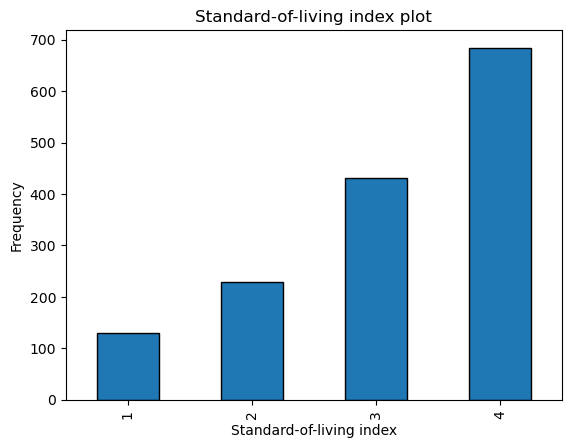

In [391]:
data.groupby('Living_index').Living_index.count().plot(kind='bar', title="Standard-of-living index plot", xlabel="Standard-of-living index", ylabel="Frequency", edgecolor='black');